In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(41)

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
from keras.callbacks import TensorBoard
#from keras.optimizers import Adam

sns.set(style='white', context='notebook', palette='deep')

In [51]:
NAME = 'MNIST_CNN_Base'
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [53]:
train.head()

y_train = train['label']
x_train = train.drop(labels = ['label'], axis=1)

del train

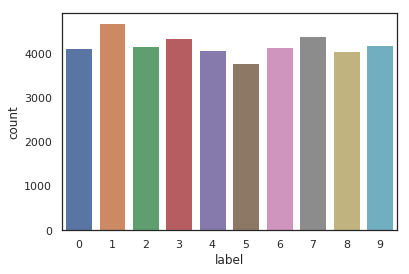

In [54]:
sns.countplot(y_train)

In [55]:
x_train.shape

(42000, 784)

In [56]:
y_train.shape

(42000,)

In [57]:
test.shape

(28000, 784)

In [58]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [59]:
# Normalize

x_train = x_train / 255.0
test = test / 255.0

In [60]:
# Reshape for CNN (height = 28, width = 28, canal = 1)

x_train = x_train.values.reshape(-1, 28, 28, 1) # values.reshape will change 
test = test.values.reshape(-1, 28, 28, 1) # pandas df to numpy array

x_train[0:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [61]:
# One hot encoding 

y_labels = y_train
y_train = to_categorical(y_train, num_classes=10)
y_train[0:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
random_seed = 41

In [63]:
# Split training and test data

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed, stratify=y_labels)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
[0, 4, 2, 7, 1, 4, 3, 3, 2, 2]


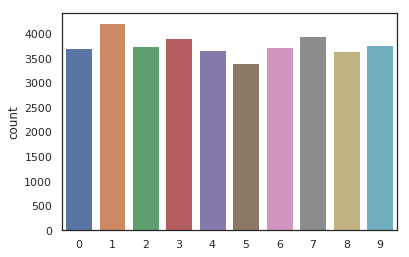

In [64]:
print(y_train)
y_labels = [np.argmax(i) for i in y_train]
print(y_labels[0:10])
sns.countplot(y_labels) # to check for stratification

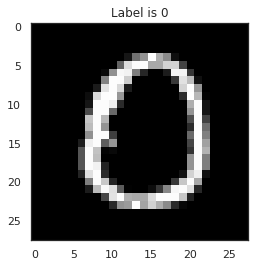

In [65]:
plt.title('Label is {}'.format(y_labels[0]))
plt.imshow(x_train[0][:,:,0], cmap='gray')

In [66]:
x_train.shape

(37800, 28, 28, 1)

In [73]:
# Create the CNN model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [74]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val,y_val), callbacks=[tensorboard])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 163s 4ms/step - loss: 0.2631 - acc: 0.9185 - val_loss: 0.0565 - val_acc: 0.9826
Epoch 2/10
37800/37800 [==============================] - 191s 5ms/step - loss: 0.0799 - acc: 0.9774 - val_loss: 0.0433 - val_acc: 0.9888
Epoch 3/10
37800/37800 [==============================] - 166s 4ms/step - loss: 0.0593 - acc: 0.9829 - val_loss: 0.0517 - val_acc: 0.9869
Epoch 4/10
37800/37800 [==============================] - 163s 4ms/step - loss: 0.0473 - acc: 0.9871 - val_loss: 0.0356 - val_acc: 0.9886
Epoch 5/10
37800/37800 [==============================] - 160s 4ms/step - loss: 0.0412 - acc: 0.9880 - val_loss: 0.0343 - val_acc: 0.9905
Epoch 6/10
37800/37800 [==============================] - 180s 5ms/step - loss: 0.0366 - acc: 0.9899 - val_loss: 0.0300 - val_acc: 0.9919
Epoch 7/10
37800/37800 [==============================] - 187s 5ms/step - loss: 0.0293 - acc: 0.9917 - val_loss: 0.0292 - v

In [76]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)
pred = pd.Series(pred, name='Label')
pred.head()

0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64

In [77]:
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), pred], axis=1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [78]:
submission.to_csv('CNN_Base_2.csv', index=False)